In [1]:
import sys
from pathlib import Path

import os

import numpy as np
from matplotlib import pyplot as plt

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [3]:
data_path = str(Path.cwd().parents[0].parents[0] / "data" / "bh" / "BH_n5_M8_res200_10000_events.h5")
bhArray = dataToArray(data_path)

In [4]:
sphdata_path = str(Path.cwd().parents[0].parents[0] / "data" / "sph" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res200_10000_events.h5")
sphArray = dataToArray(sphdata_path)

In [5]:
sphArray.shape

(10000, 200, 200, 3)

In [19]:
def combineSum(array): #combine with sum
    combinedImage = array[0].copy()
    for i in range(len(array)):
        combinedImage = np.add(combinedImage, array[i])


    return combinedImage

In [20]:
bhcombinedSum = combineSum(bhArray)
sphcombinedSum = combineSum(sphArray)

In [21]:
print(np.sum([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()]))
print(np.sum([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()]))

19928
15584


In [22]:
bhcombinedSum.shape

(200, 200, 3)

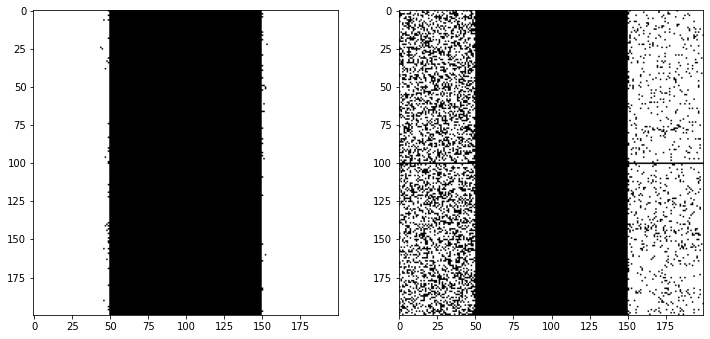

In [23]:
f, axarr = plt.subplots(1,2, figsize=(12,12))
axarr[0].imshow(np.reshape([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()],(sphcombinedSum.shape[1],sphcombinedSum.shape[1],1)),cmap='gray')
axarr[1].imshow(np.reshape([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()],(bhcombinedSum.shape[1],bhcombinedSum.shape[1],1)),cmap='gray')

In [25]:
def predbh(histo): #Returns true if bh
    a = histo[:,:,2:3].copy()
    #should be 50x50x1
    #check only valid area
    for j in range(100):
        for i in range(0,50): #0,12
            if a[j][i] != 0.0:
                # print(i,j)
                return True #bh
        
        for i in range(150,100): #38,50
            if a[j][i] != 0.0:
                # print(i,j)
                return True #bh
    return False #not bh

In [26]:
for i in range(10_000):
    if predbh(sphArray[i]):
        print(i)

29
636
788
1403
1444
2235
2281
2396
2990
3176
3217
4212
7061
7496
8065
9339
9652


In [27]:
sumbh = 0
sumsph = 0
for i in range(10_000):
    if predbh(bhArray[i]):
        sumbh += 1
    if not predbh(sphArray[i]):
        sumsph += 1

print(sumbh, "number of true bh")
print(sumsph, "number of true sph")

388 number of true bh
9983 number of true sph
